In [1]:
import tensorflow as tp

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(x_train), len(y_train), len(x_test), len(y_test)

(60000, 60000, 10000, 10000)

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_test[0].shape

(28, 28)

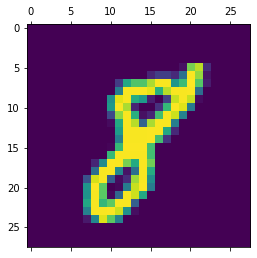

In [9]:
plt.matshow(x_train[17])

In [10]:
y_train[3]

1

In [11]:
x_train.shape #images of 28x28 size matrices with 60000 sample images

(60000, 28, 28)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train_flatten = x_train.reshape(len(x_train), 28*28) #we are flattening a 28x28 size matrix to 784x1 matrix i.e.(28*28=784)
x_test_flatten = x_test.reshape(len(x_test), 28*28)              #with 60000 samples of such matrices
x_test_flatten.shape

(10000, 784)

In [14]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')  #from input of a matrix 784x1 with 6000 samples 
])                                                                      # an output of 10x1 is obtained

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] # here the goal is to make the NN more accurate
)

model.fit(x_train_flatten, y_train, epochs = 5)  #training actually happens in model.fit().Hence here we pass training datasets
         # epochs is the number of itetrations the NN is going to run the train

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4898 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3060 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2856 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2749 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2678 - accuracy: 0.9263


In [16]:
model.evaluate(x_test_flatten, y_test) # test examples are evaluated wrt 'fit' class

313/313 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.9258


[0.2654784321784973, 0.9258000254631042]

In [17]:
y_predict = model.predict(x_test_flatten) #predict loss and accurecy for all values and is stored in 'y_predict'

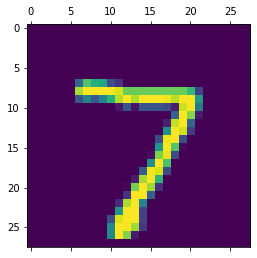

In [18]:
plt.matshow(x_test[0]) #first test image

In [19]:
y_predict[0]  #10 values are printed for 10 digits: prob. from 0,1,2..,9;;to find exact prediction, find maxvalue in matrix 

array([1.5236148e-05, 1.4427226e-10, 4.1516629e-05, 1.0284096e-02,
       1.1343678e-06, 7.3299903e-05, 1.5734447e-09, 7.3791379e-01,
       7.2528128e-05, 8.4713101e-04], dtype=float32)

In [20]:
np.argmax(y_predict[0])  # to find prediction, get maximum value

7

In [21]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5] #done!!

[7, 2, 1, 0, 4]

In [22]:
y_test[:5] #Hurrah!! original test data matrix and our predictions are same.

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
cmat = tp.math.confusion_matrix(labels = y_test, predictions = y_predict_labels) #build confusion matrix
cmat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    1,    2,    0,    5,   11,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    9,  924,   18,    8,    5,   13,   10,   36,    4],
       [   1,    0,   19,  935,    0,   18,    2,   12,   15,    8],
       [   1,    1,    3,    1,  909,    0,   13,    3,    9,   42],
       [   8,    3,    2,   39,    9,  770,   19,    7,   27,    8],
       [   7,    3,    4,    2,    7,    7,  923,    2,    3,    0],
       [   1,    6,   23,    9,    8,    0,    0,  944,    2,   35],
       [   5,    9,    6,   31,    9,   23,   10,   11,  862,    8],
       [  10,    7,    1,   12,   25,    6,    0,   20,    5,  923]])>

In [24]:
import seaborn as sn

Text(69.0, 0.5, 'TruValue')

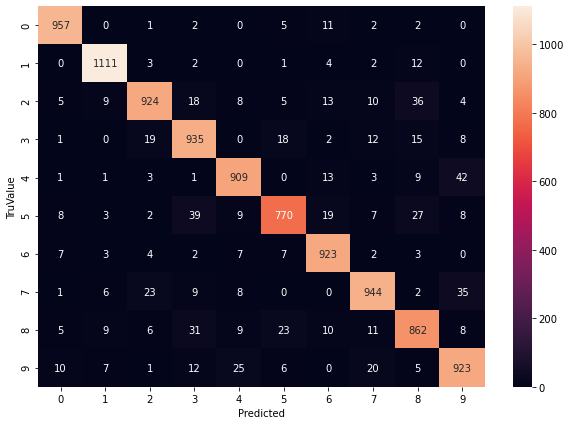

In [25]:
plt.figure(figsize = (10,7))
sn.heatmap(cmat, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('TruValue') # this is confusion matrix

In [26]:
#here we will add a hidden layer:
#150 indicates nodes in the hidden layer
#next is o/p layer. here we dont 'shape' of i/p layer. 10-nodes in  o/p layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])                                                          

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] # here the goal is to make the NN more accurate
)

model.fit(x_train_flatten, y_train, epochs = 5)  #training actually happens in model.fit().Hence here we pass training datasets
         # epochs is the number of itetrations the NN is going to run the train

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2959 - accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1420 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1024 - accuracy: 0.9697
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0791 - accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9803


In [25]:
y_predict = model.predict(x_test_flatten)

In [26]:
y_predict[0]

array([7.9747542e-07, 6.7060144e-09, 1.1612576e-04, 3.5786629e-04,
       9.3065347e-11, 3.9415581e-06, 4.1163260e-11, 9.1242653e-01,
       1.2642569e-06, 6.4273490e-06], dtype=float32)

In [27]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9694


[0.10030011832714081, 0.9693999886512756]

Text(69.0, 0.5, 'TruValue')

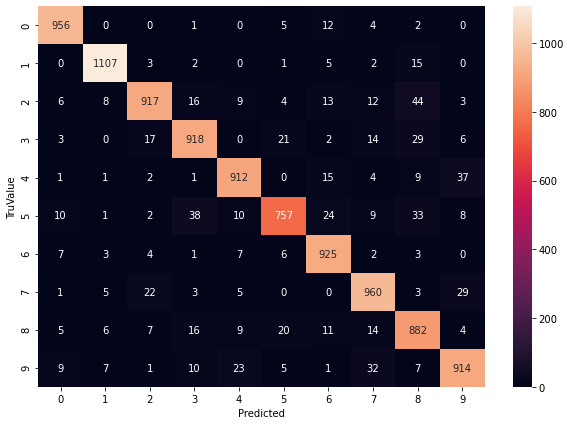

In [28]:
plt.figure(figsize = (10,7))
sn.heatmap(cmat, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('TruValue') # this is confusion matrix

In [40]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #I need not flatten the input array and define its shape on and on
    keras.layers.Dense(250, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])                                                          

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] # here the goal is to make the NN more accurate
)

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2401 - accuracy: 0.9323
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0998 - accuracy: 0.9699
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0669 - accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0495 - accuracy: 0.9850
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9879


In [41]:
import math

def sigmoid(x):
    return(1/(1+math.exp(-x)))

In [44]:
sigmoid(72)

1.0

In [45]:
sigmoid(-29)

2.543665647376276e-13

In [46]:
def tanh(x):
    return((math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x)))

In [47]:
tanh(23)

1.0

In [48]:
tanh(-34)

-1.0

In [52]:
def relu(x):
    return max(0, x)

In [53]:
relu(23)

23

In [54]:
relu(-45)

0

In [55]:
def leaky_relu(x):
    return max(0.1*x, x)

In [56]:
leaky_relu(64)

64

In [57]:
leaky_relu(-24)

-2.4000000000000004

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #I need not flatten the input array and define its shape on and on
    keras.layers.Dense(250, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])                                                          

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] # here the goal is to make the NN more accurate
)

model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2442 - accuracy: 0.9298
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1014 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0680 - accuracy: 0.9786
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0502 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9880
